In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os 
import pathlib 
import tensorflow as tf 
from tensorflow.keras import layers , Sequential
from sklearn.model_selection import train_test_split

In [10]:
import pathlib
dataset_url = r"https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [11]:
path = r"C:/Users/jaikr/.keras/datasets/flower_photos"
path

'C:/Users/jaikr/.keras/datasets/flower_photos'

In [12]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [13]:
for i in data_dir.iterdir():
    print(i)

C:\Users\jaikr\.keras\datasets\flower_photos\daisy
C:\Users\jaikr\.keras\datasets\flower_photos\dandelion
C:\Users\jaikr\.keras\datasets\flower_photos\flower_photos
C:\Users\jaikr\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\jaikr\.keras\datasets\flower_photos\roses
C:\Users\jaikr\.keras\datasets\flower_photos\sunflowers
C:\Users\jaikr\.keras\datasets\flower_photos\tulips


In [14]:
##preparing dataset 
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [15]:
##label encoding 

flower_labels = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [16]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

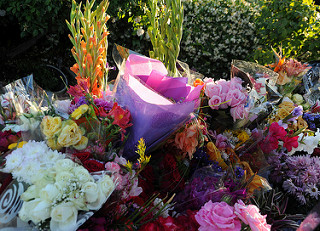

In [23]:
Image.open(flower_dict["roses"][3])

In [24]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [25]:
flower_dict.items()

dict_items([('roses', [WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('C:/Users/jaikr

In [26]:
x , y = [] , []
for key , value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_img  = cv2.resize(img , (224 , 224))
        x.append(reduced_img)
        y.append(flower_labels[key])

In [27]:
x = np.array(x)
y = np.array(y)

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [29]:
##normalise 
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

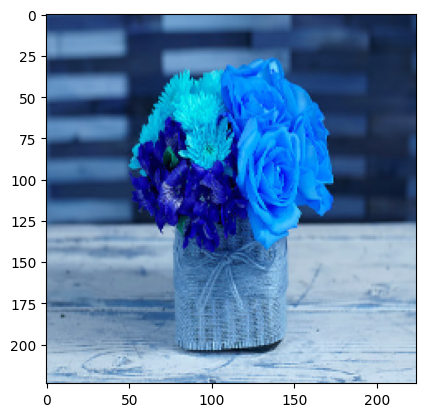

In [31]:
plt.imshow(x_train_scaled[50])

In [ ]:
##model define 
##trin , predictions , testing acc 